In [66]:

# realSum: the full price of accommodation for two people and two nights in EUR
# room_type: the type of the accommodation
# room_shared: dummy variable for shared rooms
# room_private: dummy variable for private rooms
# person_capacity: the maximum number of guests
# host_is_superhost: dummy variable for superhost status
# multi: dummy variable if the listing belongs to hosts with 2-4 offers
# biz: dummy variable if the listing belongs to hosts with more than 4 offers
# cleanliness_rating: cleanliness rating
# guest_satisfaction_overall: overall rating of the listing
# bedrooms: number of bedrooms (0 for studios)
# dist: distance from city centre in km
# metro_dist: distance from nearest metro station in km
# attr_index: attraction index of the listing location
# attr_index_norm: normalised attraction index (0-100)
# rest_index: restaurant index of the listing location
# attr_index_norm: normalised restaurant index (0-100)
# lng: longitude of the listing location
# lat: latitude of the listing location

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [5]:
def MergeDatasets():
    files = [f for f in os.listdir("archive")]
    dfs = []

    for file in files:
        fileDf = pd.read_csv("archive/" + file).drop(columns="Unnamed: 0")

        # Split the filename using underscores
        file_parts = file.split("_")

        # Create boolean columns for cities
        for i, part in enumerate(file_parts[:-1]):
            col_name = f"city_{part}"
            fileDf[col_name] = True

        # Create boolean columns for weekdays and weekends
        for part in file_parts[-1:]:
            if part.lower() == "weekends.csv":
                fileDf["is_weekend"] = True
            else:
                fileDf["is_weekend"] = False

        dfs.append(fileDf)

    mainDf = pd.concat(dfs, ignore_index=True)

    # Fill NaN values with False in the boolean columns
    mainDf = mainDf.fillna(False)

    # Save merged DataFrame to CSV
    mainDf.to_csv("DataSet.csv", index=False)

    return mainDf

Data was checked for duplicates and null values and none were found. Also all column data types were checked to see if they required any change and none did.

In [6]:
pd.set_option('display.max_columns', None)
df= MergeDatasets()
df.info()
df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,True,False,False,False,False,False,False,False,False,False,False
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,True,False,False,False,False,False,False,False,False,False,False
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,True,False,False,False,False,False,False,False,False,False,False
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,True,False,False,False,False,False,False,False,False,False,False
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,False,True,False,False,False,False,False,False,False,False,True
51703,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,False,True,False,False,False,False,False,False,False,False,True
51704,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,False,True,False,False,False,False,False,False,False,False,True
51705,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,False,True,False,False,False,False,False,False,False,False,True


In [7]:
# Create a mask filtering out the null values (True if a value is null) then summing the values of each column (True = 1, False = 0)
clue = df.isna().sum()

nrows = len(df)

# Getting the percentage of null values in each column
clue =  clue * 100 / nrows
clue

realSum                       0.0
room_type                     0.0
room_shared                   0.0
room_private                  0.0
person_capacity               0.0
host_is_superhost             0.0
multi                         0.0
biz                           0.0
cleanliness_rating            0.0
guest_satisfaction_overall    0.0
bedrooms                      0.0
dist                          0.0
metro_dist                    0.0
attr_index                    0.0
attr_index_norm               0.0
rest_index                    0.0
rest_index_norm               0.0
lng                           0.0
lat                           0.0
city_amsterdam                0.0
is_weekend                    0.0
city_athens                   0.0
city_barcelona                0.0
city_berlin                   0.0
city_budapest                 0.0
city_lisbon                   0.0
city_london                   0.0
city_paris                    0.0
city_rome                     0.0
city_vienna   

**1) Data Analysis:**

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

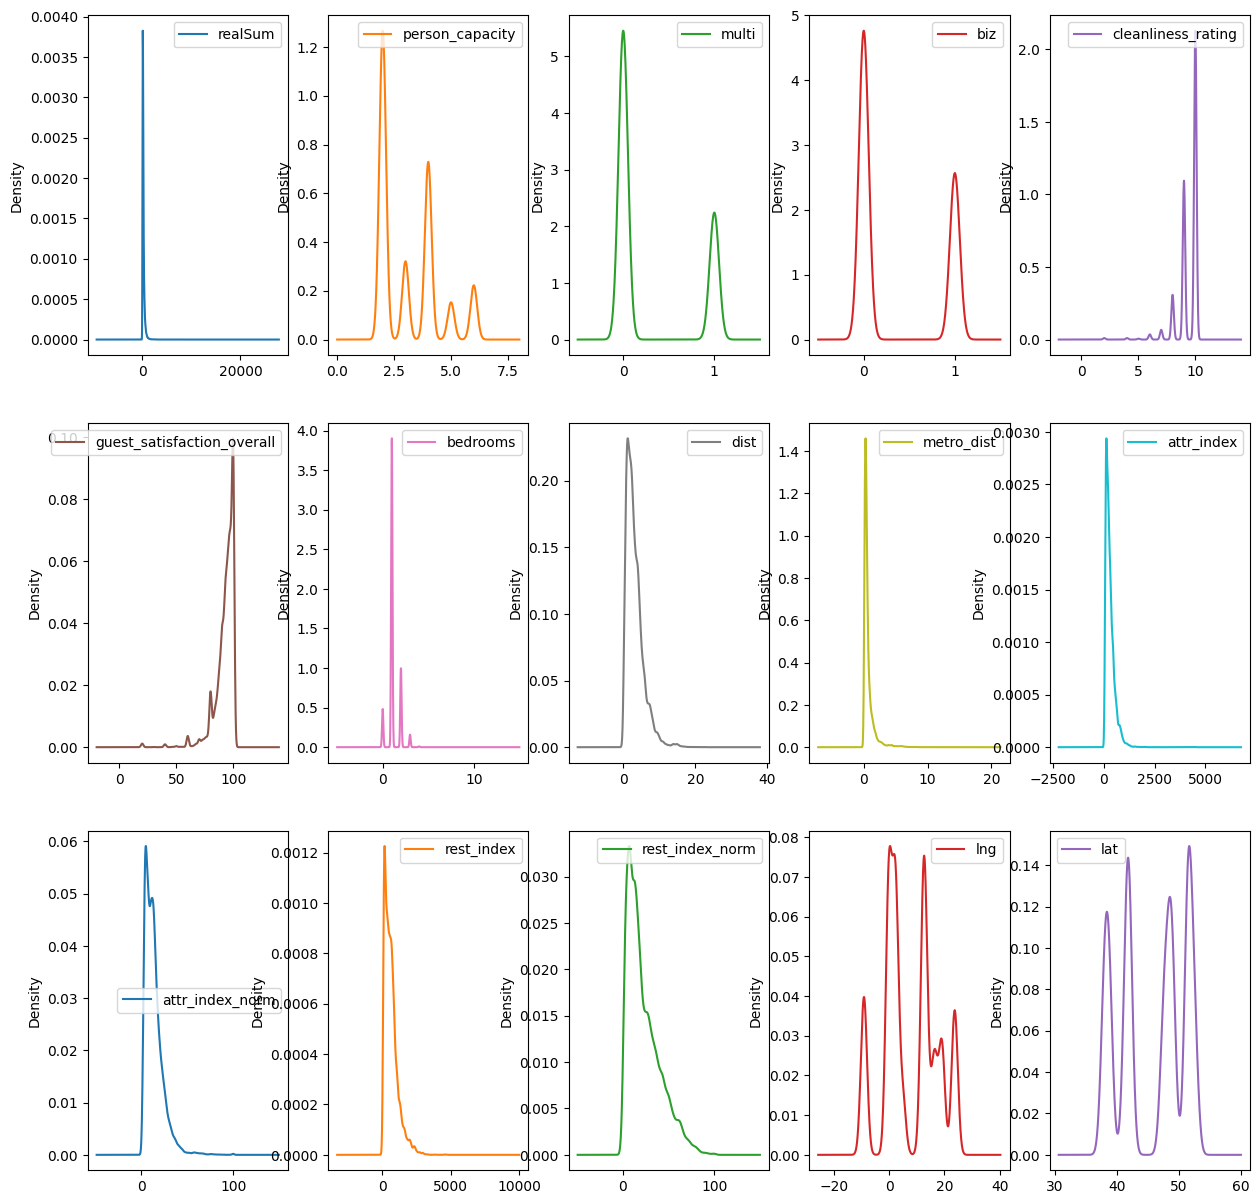

In [8]:
df.plot(kind='density', subplots=True, layout=(3,5), sharex=False,figsize=(15,15))

Density plots shows that realSum, dist, metro_dist seem to have outliers on which IQR analysis will be used while there are some columns like multi, biz and person_capacity are categories. We also have cleanliness_rating which is a scale to 10.

IQR on realSum:

Outlier Percentage in realSum 7.082213239986846 %
Number of records with outliers: 3662


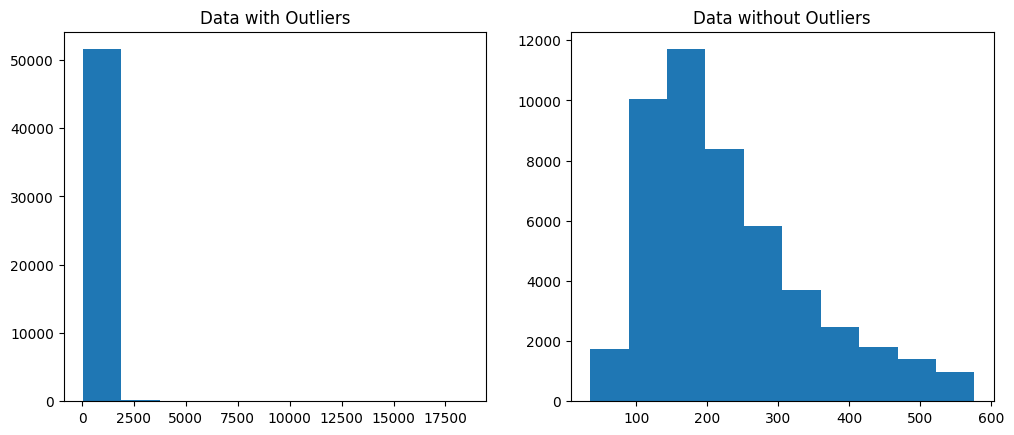

In [9]:
Q1 = np.percentile(df.realSum, 25)
Q3 = np.percentile(df.realSum, 75)
IQR = Q3 - Q1
df_clean = df[(df.realSum > Q1 - 1.5 * IQR) & (df.realSum < Q3 + 1.5 * IQR)]
plt.figure().set_figwidth(12)
plt.subplot(1,2,1)
plt.hist(df.realSum)
plt.title('Data with Outliers')
plt.subplot(1,2,2)
plt.hist(df_clean.realSum)
plt.title('Data without Outliers')
outlier_percentage = 1 - (len(df_clean) / len(df))
print('Outlier Percentage in realSum' , (outlier_percentage*100),'%')
print('Number of records with outliers:', round((len(df)*outlier_percentage)))

Since the oulier percentage in the realsum is (3662 records), and we
dropped them.

IQR on metro_dist:

Outlier Percentage in metro_dist 9.768503297425879 %
Number of records with outliers: 5051


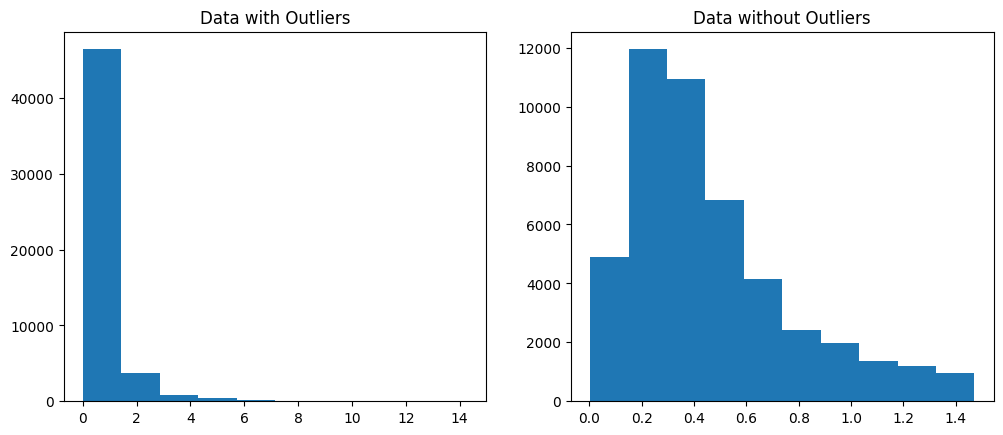

In [10]:
Q1 = np.percentile(df.metro_dist, 25)
Q3 = np.percentile(df.metro_dist, 75)
IQR = Q3 - Q1
df_clean_metro = df[(df.metro_dist> Q1 - 1.5 * IQR) & (df.metro_dist < Q3 + 1.5 * IQR)]
plt.figure().set_figwidth(12)
plt.subplot(1,2,1)
plt.hist(df.metro_dist)
plt.title('Data with Outliers')
plt.subplot(1,2,2)
plt.hist(df_clean_metro.metro_dist)
plt.title('Data without Outliers')
outlier_percentage = 1 - (len(df_clean_metro) / len(df))
print('Outlier Percentage in metro_dist' , (outlier_percentage*100),'%')
print('Number of records with outliers:', round((len(df)*outlier_percentage)))

The percentage of outliners in metro_dist is small, we will not remove them because metro_distance from Airbinb is an important metric to be considered.

**2) Data Cleaning:**

In [11]:
df_clean[~df_clean.room_private & df_clean.room_type == "Private room"]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna


In [12]:
df_clean[(df_clean.room_private & df_clean.room_type == "Shared Room") | (df_clean.room_private & df_clean.room_type == "Entire room/apt")]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna


The first expression filters the DataFrame to include only rows where the room is not private (room_private = 'false') and the room_type is 'Private room'. This expression returns with no rows, showing that all columns with room_type 'Private room' will always have the value 'true' in the room_private column.

The second expression filters the DataFrame to include only rows where the room is private (room_private = 'true') and the room type is either 'Shared Room' or 'Entire room/apt', since the 'room_type' column only contains these two other values (in addition to 'Private room' mentioned earlier). This expression also returns with no rows.

Therefore, we can observe a correlation between the 'room_type' and 'room_private' columns. The 'room_private' column only contains the value 'true' when the 'room_type' is 'Private room,' while it contains the value 'false' for any other type of 'room_type'.

In [13]:
df_clean[~df_clean.room_shared & df_clean.room_type == "Shared room"]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna


In [14]:
df_clean[(df_clean.room_shared & df_clean.room_type == "Private room") | (df_clean.room_shared & df_clean.room_type == "Entire room/apt")]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna


Similarly, the first expression filters the DataFrame to include only rows where the room is not shared (room_shared = 'false'), and the room type is 'Shared room'. This expression returns with no rows, showing that all columns with room_type 'Shared room' will always have the value 'true' in the room_shared column.

The second expression filters the DataFrame to include only rows where the room is shared (room_shared = 'true') and the room type is either 'Private Room' or 'Entire room/apt'. This expression also returns with no rows.

Therefore, we can observe a correlation between the 'room_type' and 'room_shared' columns. The 'room_shared' column only contains the value 'true' when the 'room_type' is 'Shared room,' while it contains the value 'false' for any other type of 'room_type'.


We can deduce that the 'room_type' column is one-hot encoded into 'room_private' and 'room_shared'. Since machine learning models do not read string values directly, we will create a new one-hot column for the remaining value in 'room_type' ('Entire room/apt'). Afterward, we will remove the 'room_type' column.

In [15]:
df_clean["room_entire_home_apt"] = df_clean.room_type == "Entire home/apt"

C:\Users\Ali\AppData\Local\Temp\ipykernel_22236\3833078020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["room_entire_home_apt"] = df_clean.room_type == "Entire home/apt"


In [16]:
to_drop = ['room_type']
df_clean = df_clean.drop(to_drop, axis=1)
df_clean.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_entire_home_apt
0,194.033698,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,True,False,False,False,False,False,False,False,False,False,False,False
1,344.245776,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,True,False,False,False,False,False,False,False,False,False,False,False
2,264.101422,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,True,False,False,False,False,False,False,False,False,False,False,False
3,433.529398,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,True,False,False,False,False,False,False,False,False,False,False,False
4,485.552926,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,True,False,False,False,False,False,False,False,False,False,False,False


We will aslo drop the normalized columns as, it is better to create the normalized fields when we need them and to choose on which fields we want to normalize.

In [17]:
to_drop = ['attr_index_norm', 'rest_index_norm' ]
df_clean = df_clean.drop(to_drop, axis=1)
df_clean.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_entire_home_apt
0,194.033698,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,4.90569,52.41772,True,False,False,False,False,False,False,False,False,False,False,False
1,344.245776,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,4.90005,52.37432,True,False,False,False,False,False,False,False,False,False,False,False
2,264.101422,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,4.97512,52.36103,True,False,False,False,False,False,False,False,False,False,False,False
3,433.529398,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,4.89417,52.37663,True,False,False,False,False,False,False,False,False,False,False,False
4,485.552926,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,4.90051,52.37508,True,False,False,False,False,False,False,False,False,False,False,False


In [18]:
for column_name in df_clean.columns:
    df_clean[column_name] = df_clean[column_name].astype(int)

df_clean

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_entire_home_apt
0,194,0,1,2,0,1,0,10,93,1,5,2,78,98,4,52,1,0,0,0,0,0,0,0,0,0,0,0
1,344,0,1,4,0,0,0,8,85,1,0,0,631,837,4,52,1,0,0,0,0,0,0,0,0,0,0,0
2,264,0,1,2,0,0,1,9,87,1,5,3,75,95,4,52,1,0,0,0,0,0,0,0,0,0,0,0
3,433,0,1,4,0,0,1,9,90,2,0,0,493,875,4,52,1,0,0,0,0,0,0,0,0,0,0,0
4,485,0,1,2,1,0,0,10,98,1,0,0,552,815,4,52,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51697,463,0,0,5,0,1,0,10,90,2,1,0,176,283,16,48,0,1,0,0,0,0,0,0,0,0,1,1
51700,115,0,1,4,0,1,0,9,94,1,3,0,109,208,16,48,0,1,0,0,0,0,0,0,0,0,1,0
51703,304,0,0,2,0,0,0,8,86,1,0,0,204,342,16,48,0,1,0,0,0,0,0,0,0,0,1,1
51705,301,0,1,2,0,0,0,10,87,1,3,0,109,158,16,48,0,1,0,0,0,0,0,0,0,0,1,0


We changed columns of type boolean to int for the machine learning model to be able to understand.

**Normalization**

In [19]:
df_norm = df_clean.copy()
for column_name in df_norm.columns:
    df[column_name] = df_norm[column_name]
    min_val = df_norm[column_name].min()
    max_val = df_norm[column_name].max()
    df_norm[column_name] = (df_norm[column_name] - min_val) / (max_val - min_val)

df_norm

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_entire_home_apt
0,0.295203,0.0,1.0,0.00,0.0,1.0,0.0,1.000,0.9125,0.1,0.20,0.142857,0.014006,0.011832,0.40625,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.571956,0.0,1.0,0.50,0.0,0.0,0.0,0.750,0.8125,0.1,0.00,0.000000,0.136950,0.122510,0.40625,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.424354,0.0,1.0,0.00,0.0,0.0,1.0,0.875,0.8375,0.1,0.20,0.214286,0.013339,0.011382,0.40625,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.736162,0.0,1.0,0.50,0.0,0.0,1.0,0.875,0.8750,0.2,0.00,0.000000,0.106269,0.128201,0.40625,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.832103,0.0,1.0,0.00,1.0,0.0,0.0,1.000,0.9750,0.1,0.00,0.000000,0.119386,0.119215,0.40625,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51697,0.791513,0.0,0.0,0.75,0.0,1.0,0.0,1.000,0.8750,0.2,0.04,0.000000,0.035794,0.039539,0.78125,0.733333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
51700,0.149446,0.0,1.0,0.50,0.0,1.0,0.0,0.875,0.9250,0.1,0.12,0.000000,0.020898,0.028306,0.78125,0.733333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51703,0.498155,0.0,0.0,0.00,0.0,0.0,0.0,0.750,0.8250,0.1,0.00,0.000000,0.042019,0.048375,0.78125,0.733333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
51705,0.492620,0.0,1.0,0.00,0.0,0.0,0.0,1.000,0.8375,0.1,0.12,0.000000,0.020898,0.020818,0.78125,0.733333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**3) PCA**

In [20]:
labels = df_norm['realSum'].copy()

df_2 = df_norm.drop(['realSum'], axis=1)

df_2.head()

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_entire_home_apt
0,0.0,1.0,0.0,0.0,1.0,0.0,1.000,0.9125,0.1,0.2,0.142857,0.014006,0.011832,0.40625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.5,0.0,0.0,0.0,0.750,0.8125,0.1,0.0,0.000000,0.136950,0.122510,0.40625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.875,0.8375,0.1,0.2,0.214286,0.013339,0.011382,0.40625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.5,0.0,0.0,1.0,0.875,0.8750,0.2,0.0,0.000000,0.106269,0.128201,0.40625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.000,0.9750,0.1,0.0,0.000000,0.119386,0.119215,0.40625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:

from sklearn.decomposition import PCA

pca = PCA(n_components=5)

df_pca = pca.fit_transform(df_norm)

df_2 = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# add the labels back to the iris dataframe
df_2['realSum'] = labels

df_2.head()

,PC1,PC2,PC3,PC4,PC5,realSum
0,1.094227,0.520979,-0.056409,-0.572520,0.206649,0.295203
1,0.823423,-0.109804,-0.035574,-0.569090,-0.055797,0.571956
2,0.881300,-0.748198,0.266853,-0.481180,-0.242633,0.424354
3,0.727646,-0.767108,0.245251,-0.488564,-0.191497,0.736162
4,0.851396,0.177224,0.114931,-0.504098,-0.573018,0.832103


array([[<Axes: title={'center': 'PC1'}>, <Axes: title={'center': 'PC2'}>],
       [<Axes: title={'center': 'PC3'}>, <Axes: title={'center': 'PC4'}>],
       [<Axes: title={'center': 'PC5'}>,
        <Axes: title={'center': 'realSum'}>]], dtype=object)

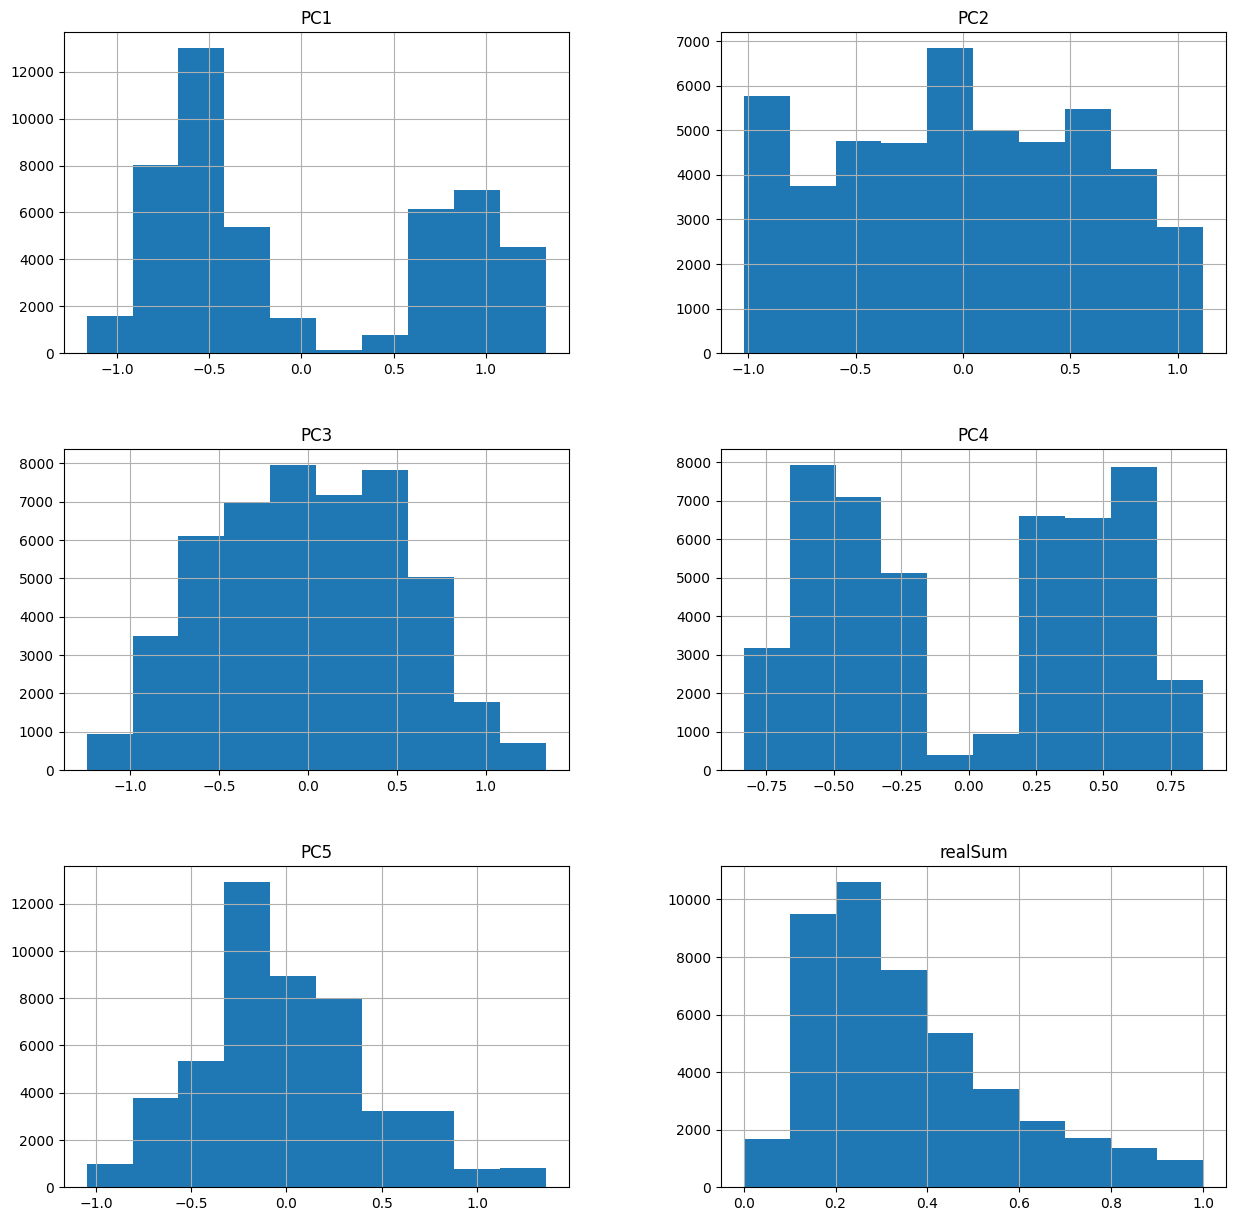

In [22]:
df_2.hist(figsize=(15,15))

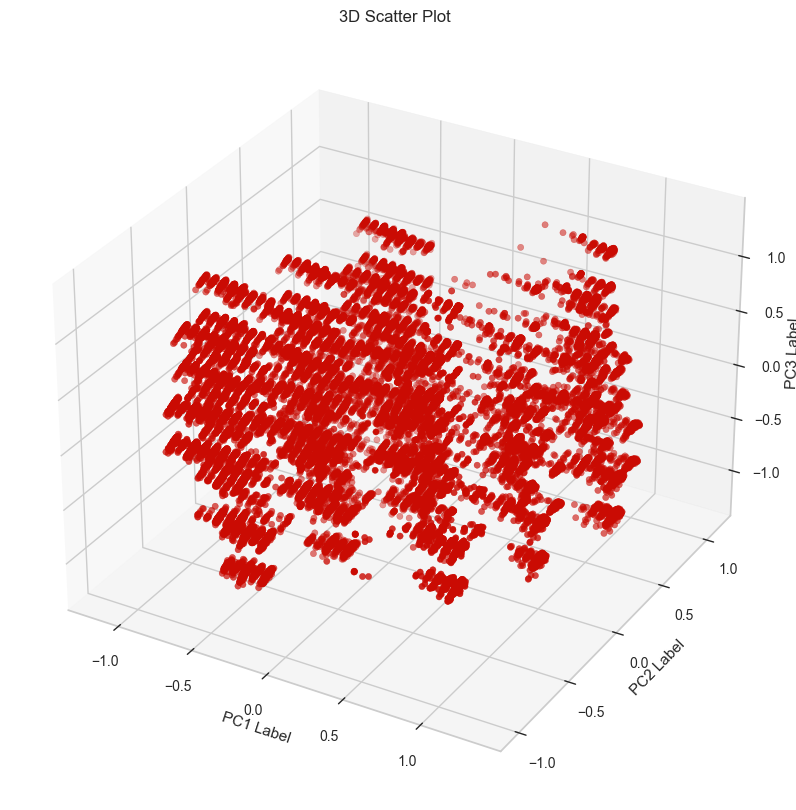

In [136]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df_2['PC1'], df_2['PC2'], df_2['PC3'], c='r', marker='o')

# Set axis labels
ax.set_xlabel('PC1 Label')
ax.set_ylabel('PC2 Label')
ax.set_zlabel('PC3 Label')

# Set plot title
plt.title('3D Scatter Plot')

# Show the plot
plt.show()

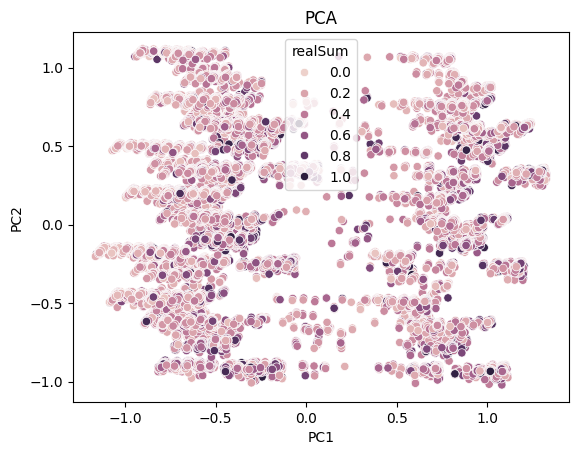

In [23]:
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', hue='realSum', data=df_2)
plt.title('PCA')
plt.show()

**Clustering**

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [25]:
df_stand = df_clean.copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_stand)


**K-Mean Clustering for Standardized data**

Text(0, 0.5, 'WCSS')

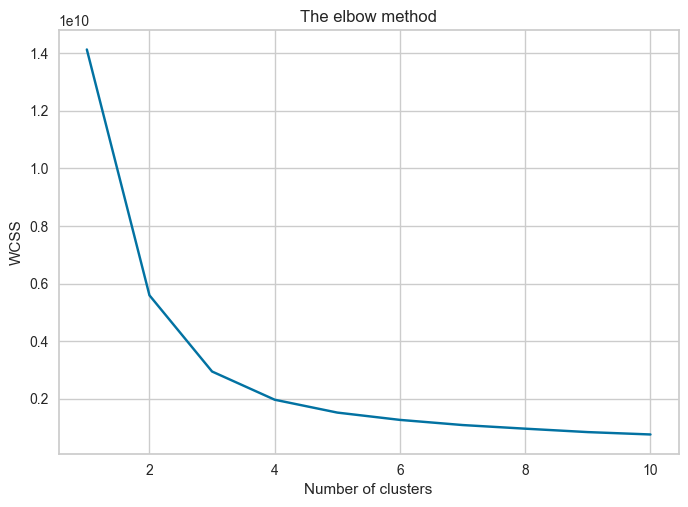

In [143]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_stand.drop("realSum", axis=1))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares


In [141]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = km.fit_predict(df_stand.drop("realSum", axis=1))
clusters = km.labels_
score = silhouette_score(df_stand.drop("realSum", axis=1), km.labels_)

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.325


**K-Mean clustering for PCA**

Text(0, 0.5, 'WCSS')

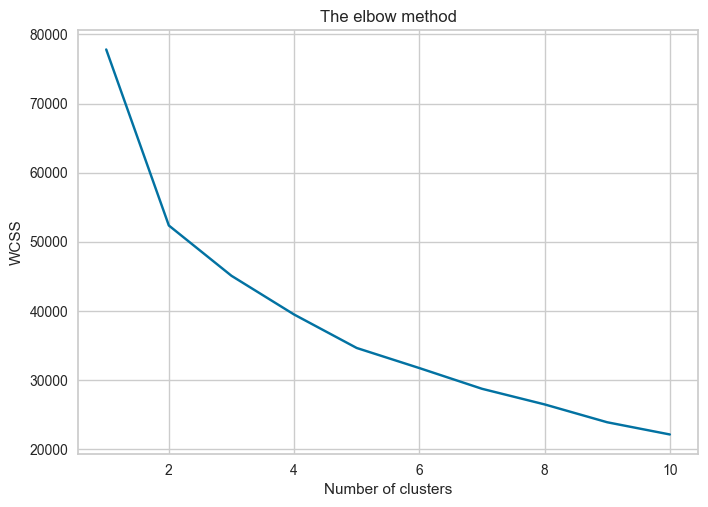

In [146]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_2.drop("realSum", axis=1))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

**K-Median Clustering**

In [148]:
from sklearn_extra.cluster import KMedoids

In [149]:
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(df_stand)

**K-Mode Clustering**

In [26]:
from kmodes.kmodes import KModes

In [29]:
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_stand)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 512914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 512914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 512914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 512914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 512914.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8720, cost: 492797.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8136, cost: 483351.0
Run 2, iteration: 2/100, moves: 586, cost: 483351.0
Init: init

Text(0.5, 1.0, 'Elbow Method For Optimal k')

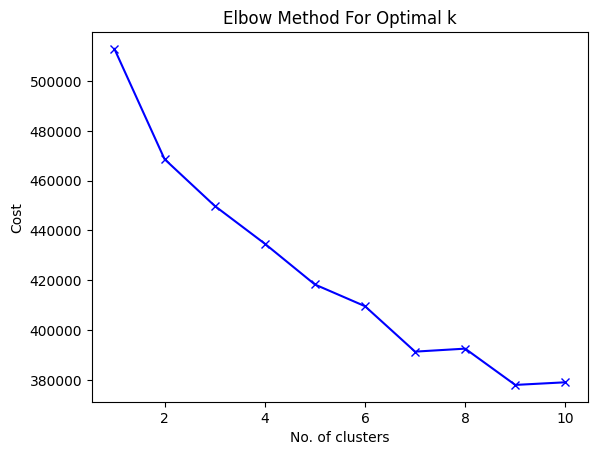

In [30]:
plt.plot(range(1,11), cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')

In [32]:
df_2

,PC1,PC2,PC3,PC4,PC5,realSum
0,1.094227,0.520979,-0.056409,-0.572520,0.206649,0.295203
1,0.823423,-0.109804,-0.035574,-0.569090,-0.055797,0.571956
2,0.881300,-0.748198,0.266853,-0.481180,-0.242633,0.424354
3,0.727646,-0.767108,0.245251,-0.488564,-0.191497,0.736162
4,0.851396,0.177224,0.114931,-0.504098,-0.573018,0.832103
...,...,...,...,...,...,...
48040,-0.528238,0.611676,-0.702835,0.267930,0.207281,0.249077
48041,0.815666,0.613766,-0.180154,0.434758,0.026972,0.322878
48042,-0.449231,0.017703,-0.632016,0.291510,-0.154248,0.322878
48043,0.793532,-0.009672,-0.204269,0.431917,-0.291888,0.479705


In [33]:
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_2.dropna())
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 266168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 266168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 266168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 266168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 266168.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 266008.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 265961.0
Init: initializing centroids
Init: initializing clusters
Starting it

Text(0.5, 1.0, 'Elbow Method For Optimal k')

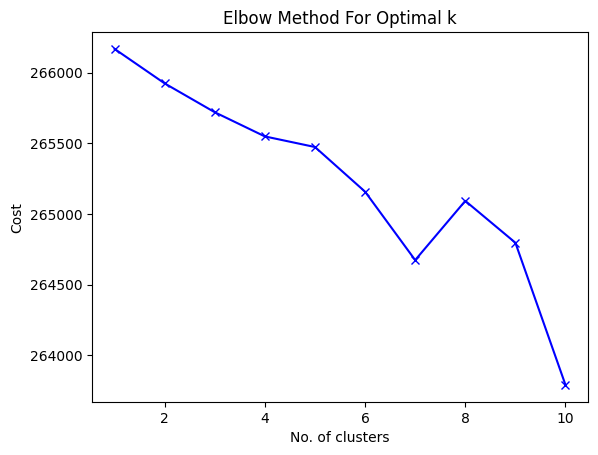

In [34]:
plt.plot(range(1,11), cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')

**DBSCAN Clustering**

In [35]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_stand.drop('realSum', axis=1))

**Silhouette Analysis for K-Mean**

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

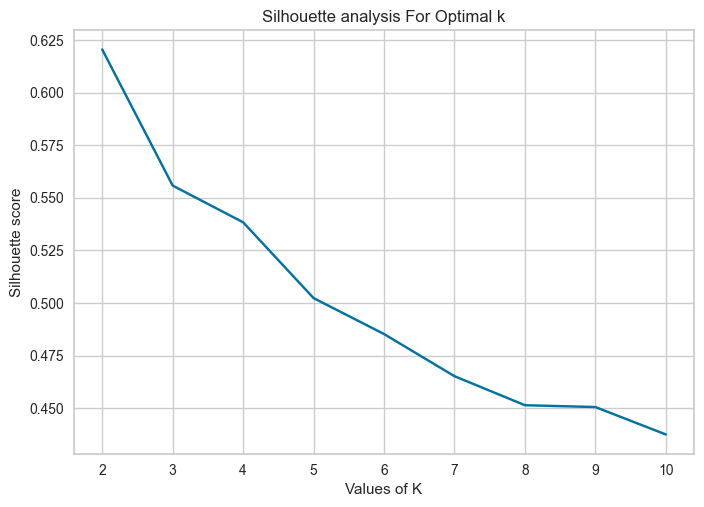

In [145]:
avg_silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_stand.drop("realSum", axis=1))
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(df_stand.drop("realSum", axis=1), cluster_labels))

plt.plot(range(2, 11),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

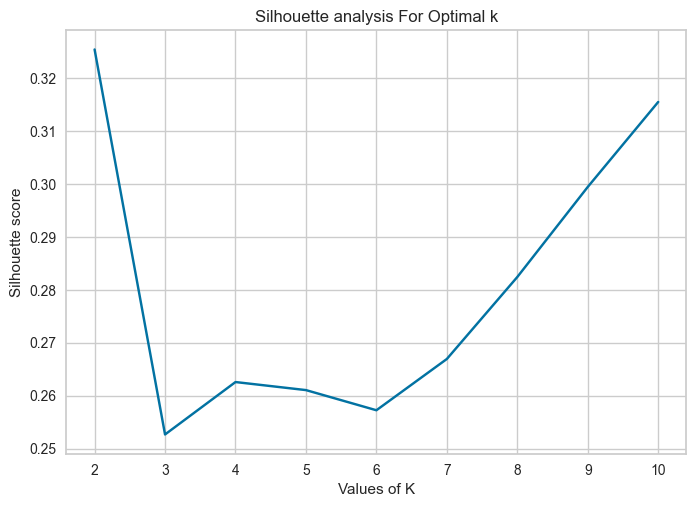

In [144]:
avg_silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_2.drop("realSum", axis=1))
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(df_2.drop("realSum", axis=1), cluster_labels))

plt.plot(range(2, 11),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

c:\Users\Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


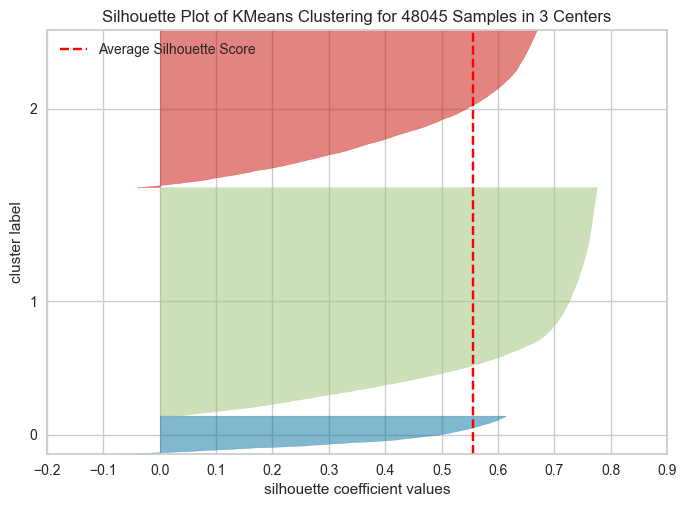

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 48045 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [132]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(km, colors='yellowbrick') #, ax=ax[q-1][mod])
visualizer.fit(df_stand.drop('realSum', axis=1))
visualizer.show()